# Embedding

## Why Embedding?
As we know, machines can't handle text, it can only handle numbers. But how to convert a word to numbers?

The most naive approach would be to take a list of all the words in your text and attribute a number to all of them. It will work but you can imagine that some problems will appear:
* How do you handle unknown words? 
* If your text contains `doctor`, `nurse`, and `candy`. `doctor` and `nurse` have a strong similarity but `candy` doesn't. How can we make the machine understand that? With our naive technique, `doctor` could have the number `5` associated to it and nurse the number `98767`.

Of course, a lot of people already spent some time with those problems. the solution that came out of it is "Embedding". 

## What is embeddings?

An embedding is a **VECTOR** which represents a word or a document.

A vector will be attributed to each token. Each vector will contain multiple dimensions (usually tens or hundreds of dimensions).

```
[...] associate with each word in the vocabulary a distributed word feature vector [...] The feature vector represents different aspects of the word: each word is associated with a point in a vector space. The number of features [...] is much smaller than the size of the vocabulary.
```
- [A Neural Probabilistic Language Model](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf), 2003.

Long story short, embeddings convert words into vectors in a way that allows the machine to understand the similarity betweens them.

Each embedding library has it's own way of classifying words, it will regroup words into big categories. Each word will get a score for each category.

To take a simple example the word `mother` could be classified like that:

|        | female | family | human | animal|
|--------|--------|---------|-------|-------|
| mother | 0.9    | 0.9.    | 0.7   | 0.1   |

**Explanations:** Mother has a strong similarity with female, family and human but it has a low similarity with animal.

**Disclaimer:** Those numbers and categories are totally arbitrary and are only here to show an example.

Here is another example with more complete datas:

![embedding](https://miro.medium.com/max/2598/1*sAJdxEsDjsPMioHyzlN3_A.png)

## Should I do it by hand?

You could, but if some people already did the job for you and spent a lot of time to optimize it, why not use it?

## What to use?

There are a lot of libraries out there for embeddings. Which one is the best? Once again, *it depends*. The results will change depending on the text you are using, the information you want to extract, the model you use,...

Choosing the "best" embedding model will be part of the hyper-optimization that you can do at the end of a project.

If you want understand embeddings more in depth, [follow this link](http://jalammar.github.io/illustrated-word2vec/) or watch this [video](https://www.youtube.com/watch?v=gQddtTdmG_8).

Here are some of the best libraries:

* [Gensim](https://pypi.org/project/gensim/)
* [Word2Vec](https://www.tensorflow.org/tutorials/text/word2vec)

This next bit of code loads a model for practice

In [ ]:
import os #  to check if files exist on disk.
import gensim.downloader as api #  allows downloading pretrained NLP models.
from gensim.models import KeyedVectors #  KeyedVectors is used to handle word vectors.
# This script checks if a pretrained GloVe model exists locally, and if not, downloads it.
import math
import numpy as np

# Path where you want to store/load the model
model_path = "glove-wiki-gigaword-300.kv"

# Load model from disk if exists, else download and save it
if os.path.exists(model_path):
    print("Loading model from local file...")
    model = KeyedVectors.load("data/"+model_path)
else:
    print("Downloading model...")
    model = api.load(model_path[:-3])
    model.save("data/"+model_path)
    print("Model downloaded and saved.")

[==================================================] 100.0% 376.1/376.1MB downloaded
Model downloaded and saved.


## Practice time!

Enough reading, let's practice a bit. On this sentence:

In [3]:
sentence = "I love learning"

What do the word vectors look like? What is their size? What is their [magnitude](https://numpy.org/doc/2.1/reference/generated/numpy.linalg.norm.html)?

In [4]:
words = sentence.lower().split()  # Convert to lowercase and split

# Loop through each word
for word in words:
    if word in model:
        vector = model[word]  # Get the word vector
        magnitude = np.linalg.norm(vector)  # Calculate the magnitude (Euclidean norm)
        print(f"Word: {word}")
        print(f"Vector (first 10 values): {vector[:10]}")  # Preview first 10 values
        print(f"Vector size: {vector.shape[0]}")  # Should be 300 for GloVe
        print(f"Magnitude: {magnitude:.4f}")
        print("-" * 40)
    else:
        print(f"Word '{word}' not in vocabulary.")

Word: i
Vector (first 10 values): [-0.13292   0.16985  -0.1436   -0.088722  0.07951  -0.14212  -0.024209
 -0.26291  -0.074814 -2.36    ]
Vector size: 300
Magnitude: 6.9177
----------------------------------------
Word: love
Vector (first 10 values): [-0.45205  -0.33122  -0.063607  0.028325 -0.21372   0.16839  -0.017186
  0.047309 -0.052355 -0.98706 ]
Vector size: 300
Magnitude: 6.1361
----------------------------------------
Word: learning
Vector (first 10 values): [-0.38732   -0.32467    0.22053   -0.12059   -0.14239    0.0017644
  0.047267  -0.10137    0.01616   -1.4371   ]
Vector size: 300
Magnitude: 5.9555
----------------------------------------


Notes by me: 
### the magnitude can give some subtle signals like:

- How frequent or important a word might be in the corpus

- Sometimes used in normalization or to detect outliers

- May vary slightly depending on training method

Checking magnitude is helpful for: Debugging embeddings, Understanding frequency patterns, Deciding whether to normalize vectors

*** Cosine similarity (angle between vectors) is more important for comparing meanings.



## Maths on text

Since the words are embedded into vectors we can now apply mathematical methods on them.

### Average vector

For example we could build the average vector for a text by using NumPy! This is a straightforward way to build one single representation for a text.

- Apply a gensim model on the text
- Get all word vectors into a list
- Compute and display the average vector of the list
- Get it's representation using the gensim most_similar method

In [ ]:
text = "I want to be a famous data scientist"

# Your code here
# Tokenize (simple whitespace split and lowercase)
tokens = text.lower().split()

# Extract vectors for words that exist in the model
vectors = [model[word] for word in tokens if word in model]

# Check that we have at least one vector
if vectors:
    # Compute the average vector
    avg_vector = np.mean(vectors, axis=0)

    # Display the vector (first 10 values for readability)
    print("Average Vector (first 10 dims):", avg_vector[:10])

    # Find top 5 words most similar to this average vector
    similar_words = model.similar_by_vector(avg_vector, topn=5)
    print("\nWords most similar to the average meaning of the sentence:")
    for word, score in similar_words:
        print(f"{word:15} : {score:.4f}")
else:
    print("No known words from the model found in the sentence.")



Average Vector (first 10 dims): [-0.06724676  0.11244775 -0.07715999 -0.16942851 -0.05581862 -0.09414901
 -0.05271751 -0.16359037  0.1710469  -1.7930238 ]

Words most similar to the average meaning of the sentence:
so              : 0.7829
not             : 0.7720
you             : 0.7669
n't             : 0.7651
this            : 0.7642


In [ ]:
# test
import gensim.downloader as api
import numpy as np

model = api.load("glove-wiki-gigaword-300")

words = ["data", "science", "future"]
vectors = [model[w] for w in words if w in model]
avg_vector = np.mean(vectors, axis=0)

print(model.similar_by_vector(avg_vector, topn=5))

[('data', 0.7441316843032837), ('science', 0.7414958477020264), ('future', 0.6801506280899048), ('research', 0.6670560240745544), ('technology', 0.6657642722129822)]


### Word similarity

We can also compute the similarity between two words by using distance measures (e.g. [cosine similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html), [euclidean distance](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.euclidean_distances.html)...). These measures will calculate the distance between word embeddings in the vector space.

Identify what fundamental difference there is between these two metrics when it comes to assessissing similarity between vectors.

#### Let's practice!

- Compute the cosine and the euclidean distance between those 4 words in a similarity table visualizing it with matplotlib and/or seaborn
- Assess which words are the most similar and the most dissimilar

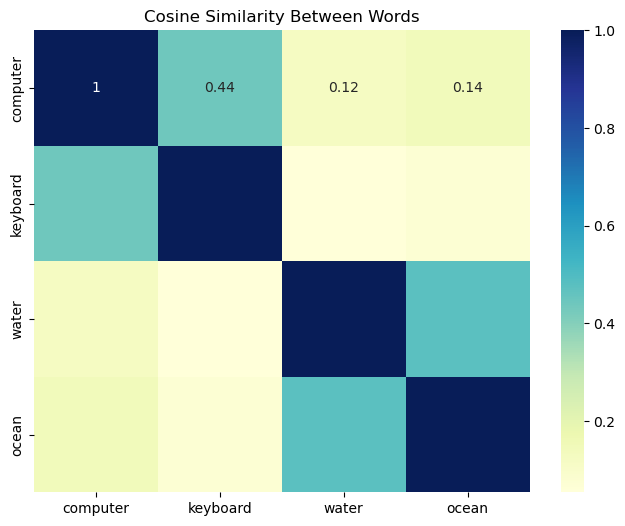

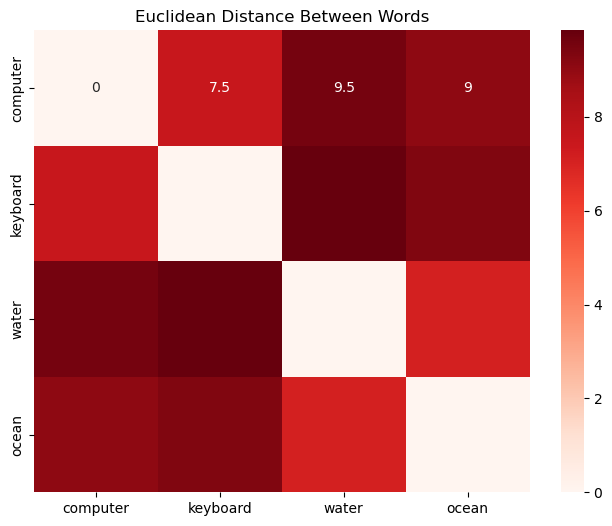

In [2]:
words = ["computer","keyboard","water","ocean"]

#Your code here
import gensim.downloader as api
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Load pre-trained model (GloVe vectors)
model = api.load("glove-wiki-gigaword-300")

# List of words to compare
words = ["computer", "keyboard", "water", "ocean"]

# Get word vectors
vectors = [model[word] for word in words]

# Compute cosine similarity matrix
cos_sim_matrix = cosine_similarity(vectors)

# Compute Euclidean distance matrix
eucl_dist_matrix = euclidean_distances(vectors)

# Convert to numpy arrays for nicer labels in seaborn
cos_sim_matrix = np.round(cos_sim_matrix, 3)
eucl_dist_matrix = np.round(eucl_dist_matrix, 3)

# --- Visualization ---

# Cosine similarity heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cos_sim_matrix, xticklabels=words, yticklabels=words, annot=True, cmap="YlGnBu")
plt.title("Cosine Similarity Between Words")
plt.show()

# Euclidean distance heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(eucl_dist_matrix, xticklabels=words, yticklabels=words, annot=True, cmap="Reds")
plt.title("Euclidean Distance Between Words")
plt.show()

Notes by me: 

- Cosine Similarity	1 = very similar, 0 = unrelated, -1 = opposite direction
- Euclidean Distance	0 = identical, larger = more distant (in terms of vector magnitude)

## Combining things together

This next bit of code uses the gensim library to allow you to perform arithmetic operations on vectors. Things you may want to try:

Silly additions:
 - man + hair

Checking for some more abstractions:
 - hair - woman + man
 - mice - home + city
 - children - child + goose
 - paris - france + belgium
 - triceratops - deer + wolf

Bonus points if you can make a function which takes any form of addition and substraction calculations on word vectors.

In [ ]:
equals=model.most_similar(positive=['king', 'woman'], negative=['man'])[0][0]
print(f"'king' - 'man' + 'woman' = '{equals}'")

#THE REST OF YOUR CODE HERE

'king' - 'man' + 'woman' = 'queen'
'mice' + 'city' - 'home' = 'rats'
'hung' + 'leuven' - 'hang' = 'katholieke'


When you play with these examples (or others). You quickly notice both the powerful levels of abstraction and the gaping limitations.

## More resources
* [Why do we use word embeddings in NLP?](https://towardsdatascience.com/why-do-we-use-embeddings-in-nlp-2f20e1b632d2)
* [More details on what word embeddings are exactly?](https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/)